In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 只考虑标签为0和1的数据
indices = (y == 0) | (y == 1)
X = X[indices]
y = y[indices]

# 只使用花瓣长度和花瓣宽度两个属性
X = X[:, 2:4]

接下来，使用支持向量机进行分类：

1.线性可分支持向量机（硬间隔支持向量机）:

In [3]:
svm_hard = SVC(kernel='linear', C=1e10)
svm_hard.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

2.线性支持向量机（软间隔支持向量机）:

In [4]:
svm_soft = SVC(kernel='linear', C=1.0)
svm_soft.fit(X, y)

SVC(kernel='linear')

In [5]:
def plot_decision_boundary(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

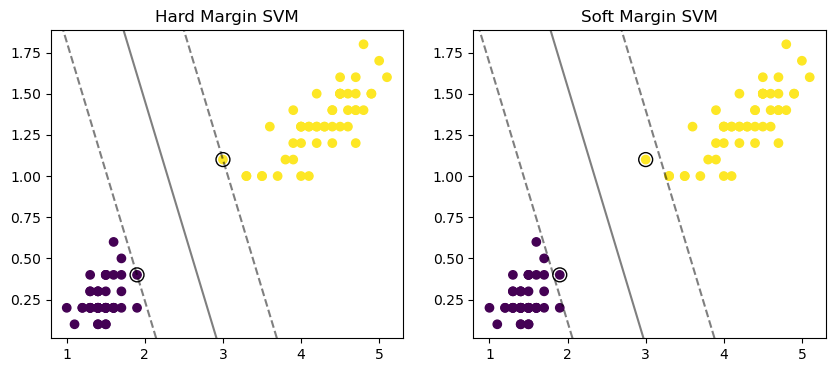

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))

axes[0].scatter(X[:, 0], X[:, 1], c=y)
axes[0].set_title("Hard Margin SVM")
plot_decision_boundary(svm_hard, axes[0])

axes[1].scatter(X[:, 0], X[:, 1], c=y)
axes[1].set_title("Soft Margin SVM")
plot_decision_boundary(svm_soft, axes[1])

plt.show()

从图中，我们可以对这两种支持向量机（SVM）分类方式（硬间隔和软间隔）在鸢尾花数据集上的分类效果进行评价：

1. **硬间隔SVM（Hard Margin SVM）**:
    - 从图像中可以看到，硬间隔SVM尝试找到一个完全正确分类所有数据点的决策边界，这也是为什么它被称为“硬间隔”。
    - 在此数据集上，存在一个或多个数据点（被圆圈标记）很接近决策边界，可能是噪声或异常值。硬间隔SVM受到这些点的强烈影响，导致决策边界偏向这些点。
    - 虽然在此训练集上它可以达到完美分类，但由于对噪声或异常值的高度敏感性，它可能在新数据或测试数据上表现不佳。

2. **软间隔SVM（Soft Margin SVM）**:
    - 软间隔SVM允许某些数据点被错误分类，这给予模型一定的“容错能力”。
    - 从图像中可以看出，虽然存在一个被圆圈标记的数据点在决策边界的错误一侧，但决策边界相对更中心，可能对新数据的泛化效果更好。
    - 由于其允许一定的错误，软间隔SVM可以更好地处理数据噪声和异常值。

**总结**:

- 对于存在噪声或异常值的实际数据集，软间隔SVM可能是更好的选择，因为它可以提供更好的泛化能力。
- 硬间隔SVM可能更适合完全线性可分的数据，或在我们确定数据几乎没有噪声时。
- 在这种情况下，软间隔SVM提供的决策边界似乎更具代表性和稳健性。

当然，为了更准确地评估模型的性能，我们还需要在独立的测试集上评估它们，并考虑其他评价指标，如准确率、召回率、F1得分等。